## DNN on the Pima Indian Diabetic Dataset

## Reading Data

In [1]:
'''Import necessary packages'''
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
path = %pwd
df = pd.read_csv(f'{path}/pima-indians-diabetes.data',header = None)
print(df.shape)
df.head()

(768, 9)


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
def nullValueSummary(df):
    return df.isnull().sum()

In [4]:
nullValueSummary(df)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

## Split Dataset into Train_Valid_Test

In [6]:
def mydf_splitter(my_df,num_rows):
    return my_df[:num_rows].copy(),my_df[num_rows:]

In [7]:
# TrainValid and Test Split
from sklearn.model_selection import train_test_split
df_trn_val,df_tst = mydf_splitter(df,600)
print(df_trn_val.shape,df_tst.shape)

(600, 9) (168, 9)


In [8]:
X = df_trn_val.iloc[:,:8]
Y = df_trn_val.iloc[:,8:9]

# Train-Valid Split
(X_train, X_valid, Y_train, Y_valid) = train_test_split(X, Y, test_size=0.33, random_state=1)
print(X_train.shape,X_valid.shape,Y_train.shape,Y_valid.shape)

X_test = df_tst.iloc[:,:8]
Y_test = df_tst.iloc[:,8:9]

(402, 8) (198, 8) (402, 1) (198, 1)


## Preprocessing Data

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#Pre-processing train dataset
standardized = scaler.fit_transform(X_train)
inverse = scaler.inverse_transform(standardized)
X_train = pd.DataFrame(inverse);

#Pre-processing valid dataset
standardized = scaler.fit_transform(X_valid)
inverse = scaler.inverse_transform(standardized)
X_valid = pd.DataFrame(inverse);

#Pre-processing test dataset
standardized = scaler.fit_transform(X_test)
inverse = scaler.inverse_transform(standardized)
X_test = pd.DataFrame(inverse);


## Deep Learning Model

In [10]:
# Build the deep neural network
model = Sequential()
model.add(Dense(10, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(6, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [11]:
# Compile the DNN

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# Fit the DNN with your train data
from keras.callbacks import History 
history = History()
epochs = 100;
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=5, validation_data=(X_valid, Y_valid))

Epoch 1/100
81/81 [==============================] - 1s 7ms/step - loss: 0.6859 - accuracy: 0.6642 - val_loss: 0.6795 - val_accuracy: 0.6313
Epoch 2/100
81/81 [==============================] - 0s 2ms/step - loss: 0.6642 - accuracy: 0.6642 - val_loss: 0.6746 - val_accuracy: 0.6313
Epoch 3/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6546 - accuracy: 0.6642 - val_loss: 0.6650 - val_accuracy: 0.6313
Epoch 4/100
81/81 [==============================] - 0s 2ms/step - loss: 0.6430 - accuracy: 0.6642 - val_loss: 0.6594 - val_accuracy: 0.6313
Epoch 5/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6319 - accuracy: 0.6692 - val_loss: 0.6455 - val_accuracy: 0.6111
Epoch 6/100
81/81 [==============================] - 0s 4ms/step - loss: 0.6225 - accuracy: 0.6741 - val_loss: 0.6445 - val_accuracy: 0.6313
Epoch 7/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6107 - accuracy: 0.7139 - val_loss: 0.6639 - val_accuracy: 0.6212
Epoch 8/100
8

Epoch 59/100
81/81 [==============================] - 0s 2ms/step - loss: 0.5162 - accuracy: 0.7562 - val_loss: 0.6280 - val_accuracy: 0.6970
Epoch 60/100
81/81 [==============================] - 0s 3ms/step - loss: 0.5161 - accuracy: 0.7488 - val_loss: 0.6040 - val_accuracy: 0.6717
Epoch 61/100
81/81 [==============================] - 0s 1ms/step - loss: 0.5066 - accuracy: 0.7537 - val_loss: 0.6268 - val_accuracy: 0.6869
Epoch 62/100
81/81 [==============================] - 0s 2ms/step - loss: 0.5159 - accuracy: 0.7687 - val_loss: 0.5999 - val_accuracy: 0.6566
Epoch 63/100
81/81 [==============================] - 0s 4ms/step - loss: 0.5129 - accuracy: 0.7562 - val_loss: 0.6004 - val_accuracy: 0.6566
Epoch 64/100
81/81 [==============================] - 0s 2ms/step - loss: 0.5046 - accuracy: 0.7662 - val_loss: 0.6100 - val_accuracy: 0.6818
Epoch 65/100
81/81 [==============================] - 0s 2ms/step - loss: 0.5049 - accuracy: 0.7687 - val_loss: 0.6308 - val_accuracy: 0.6919
Epoch 

In [13]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [14]:
score_valid = model.evaluate(X_valid,Y_valid)
print ("Accuracy: %.2f%%" %(score_valid[1]*100))

7/7 [==============================] - 0s 1ms/step - loss: 0.5860 - accuracy: 0.6869
Accuracy: 68.69%


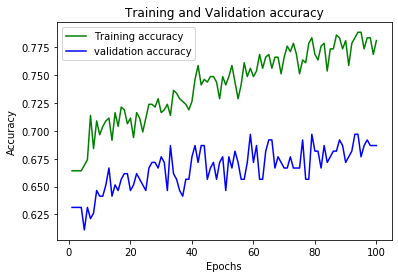

In [15]:
# Plotting Training accuracy vs Validation Accuracy
import matplotlib.pyplot as plt
epochs = range(1,101)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Hyper-Parameter Tuning

In [16]:
from keras.optimizers import Adam 
import keras
from keras.layers import Dense    #for Dense layers
from keras.layers import BatchNormalization #for batch normalization
from keras.models import Sequential #for sequential implementation
from keras.optimizers import Adam   #for adam optimizer
from keras import regularizers      #for l2 regularization
from keras.wrappers.scikit_learn import KerasRegressor 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
def create_model(learning_rate = 0.001, activation='relu'):
  
    # Set Adam optimizer with the given learning rate
    opt = Adam(lr = learning_rate)
   
    # Create your binary classification model  
    model = Sequential()
    model.add(Dense(10,
                    activation = activation))
    model.add(Dense(6,
                    activation = activation))
    model.add(Dense(1, activation = activation))
    
    # Compile the model
    model.compile(optimizer = opt,
                  loss = "mean_absolute_error",
                  metrics = ['mse', "mape"])
    return model

In [17]:
# Create model
model1 = KerasRegressor(build_fn = create_model,
                       verbose = 0)

In [18]:
# Parameters
params = {'activation': ["relu", "tanh"],
          'batch_size': [16, 32, 64], 
          'epochs': [50, 100],
          'learning_rate': [0.01, 0.001, 0.0001]}

In [19]:
random_search = RandomizedSearchCV(model1,
                                   param_distributions = params,
                                   cv = KFold(10))

In [20]:
random_search_results = random_search.fit(X_valid, Y_valid)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended

In [21]:
# Best paramters
print("Best Score: ",
      random_search_results.best_score_,
      "and Best Params: ",
      random_search_results.best_params_)

Best Score:  -0.368157896399498 and Best Params:  {'learning_rate': 0.01, 'epochs': 50, 'batch_size': 32, 'activation': 'relu'}


In [22]:
best_activation = random_search_results.best_params_['activation']
best_epochs = random_search_results.best_params_['epochs']
best_batch_size = random_search_results.best_params_['batch_size']
best_learning_rate = random_search_results.best_params_['learning_rate']
best_optimizer = Adam(lr = best_learning_rate)

In [23]:
# Creating Model with Best parameters
model2 = Sequential()
model2.add(Dense(10, activation=best_activation))
model2.add(Dense(6, activation=best_activation))
model2.add(Dense(1, activation=best_activation))

model2.compile(loss='binary_crossentropy', optimizer=best_optimizer, metrics=['accuracy'])



model2.fit(X_valid, Y_valid, epochs=best_epochs, batch_size=best_batch_size,validation_data=(X_test, Y_test))

Epoch 1/50

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

7/7 [==============================] - 0s 24ms/step - loss: 8.5373 - accuracy: 0.3687 - val_loss: 8.5815 - val_accuracy: 0.3690
Epoch 2/50
7/7 [==============================] - 0s 12ms/step - loss: 9.2986 - accuracy: 0.3636 - val_loss: 8.4723 - val_accuracy: 0.3810
Epoch 3/50
7/7 [==============================] - 0s 9ms/step - loss: 8.8617 - accuracy: 0.3889 - val_loss: 8.7008 - val_accuracy: 0.3988
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 8.3328 - accuracy: 0.4

Epoch 49/50
7/7 [==============================] - 0s 6ms/step - loss: 0.8497 - accuracy: 0.6818 - val_loss: 0.8920 - val_accuracy: 0.6905
Epoch 50/50
7/7 [==============================] - 0s 8ms/step - loss: 0.8436 - accuracy: 0.7121 - val_loss: 0.8892 - val_accuracy: 0.7560


In [24]:
# Evaluating Test Set
score_valid = model2.evaluate(X_test,Y_test)
print ("Accuracy: %.2f%%" %(score_valid[1]*100))

6/6 [==============================] - 0s 2ms/step - loss: 0.8892 - accuracy: 0.7560
Accuracy: 75.60%


## ROC curve and AUC

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
y_pred= model2.predict(X_test)

# ROC Curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, y_pred)

# AUC
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

print('roc-auc is {:.3f}'.format(roc_auc_score(Y_test,y_pred)))

roc-auc is 0.727


In [26]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])


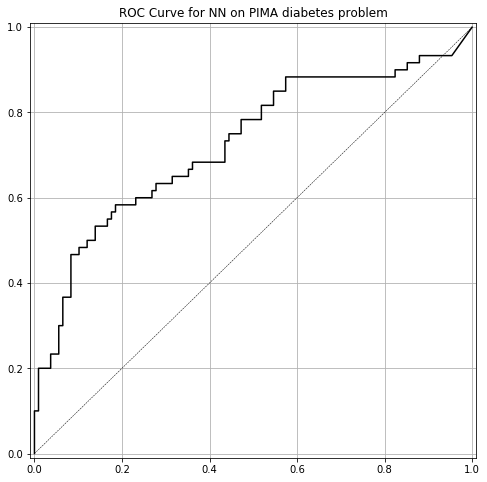

In [27]:
plot_roc(Y_test, y_pred, 'NN')